# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jhunt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)
btc_news['totalResults']

8313

In [5]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(
    q='Ethereum',
    language="en"
)
eth_news['totalResults']

2441

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in btc_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)
btc_df.head()


,text,date,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.2732,0.097,0.000,0.903


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(bitcoin_sentiments)

eth_df.head()

,text,date,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.2732,0.097,0.000,0.903


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020830,0.049000,0.045950,0.905000
std,0.399364,0.064777,0.054636,0.080938
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.028500,0.916000
75%,0.202300,0.105750,0.077750,1.000000
max,0.726400,0.178000,0.184000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,40.000000,40.000000,40.000000,40.000000
mean,0.107118,0.063825,0.035250,0.900900
std,0.409398,0.067676,0.046639,0.072962
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.841750
50%,0.038600,0.063500,0.000000,0.920000
75%,0.424900,0.114000,0.077000,0.930750
max,0.771700,0.194000,0.184000,1.000000


In [ ]:
btc_positive_mean=round(bitcoin_df.positive.mean(),3)
eth_positive_mean=round(ethereum_df.positive.mean(),3)
btc_compound_mean=round(bitcoin_df.compound.mean(),3)
eth_compound_mean=round(ethereum_df.compound.mean(),3)
btc_compound_max=round(bitcoin_df.compound.max(),3)
eth_compound_max=round(ethereum_df.compound.max(),3)
btc_positive_max=round(bitcoin_df.positive.max(),3)
eth_positive_max=round(ethereum_df.positive.max(),3)

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with 0.063

Q: Which coin had the highest compound score?

A: Ethereum with 0.77

Q. Which coin had the highest positive score?

A: Ethereum with 0.194

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function

    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
      # Remove the stop words
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output
    
btc_word_tokenized = []
for text in btc_df.text:   
    words = []
    words = words + tokenizer(text)
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

eth_word_tokenized = []
for text in eth_df.text: 
    words = []
    words = words + tokenizer(text)
    eth_word_tokenized.append(words)
print(eth_word_tokenized)    


[['like', 'dogecoin', 'devotee', 'mayor', 'reno', 'leader', 'el', 'salvador', 'aldo', 'baoicchi', 'convinced', 'cryptocurrency', 'future', 'ceo', 'founder', 'canadian', 'scooter', 'maker', 'daymak', 'belief'], ['filed', 'underthe', 'supply', 'chain', 'attack', 'reached', 'thousand', 'organizationsillustration', 'alex', 'castro', 'vergethree', 'day', 'ransomware', 'attacker', 'started', 'holiday', 'weekend', 'comprom'], ['image', 'copyrightgetty', 'imagesthe', 'gang', 'behind', 'colossal', 'ransomware', 'attack', 'demanded', 'paid', 'bitcoin', 'return', 'universal', 'decryptor', 'say', 'unlock', 'file'], ['retail', 'investor', 'grew', 'comfortable', 'buying', 'cryptocurrencies', 'like', 'bitcoin', 'ethereum', 'decentralized', 'application', 'world', 'still', 'lot', 'work', 'come', 'onboarding'], ['longtime', 'techcrunch', 'reader', 'know', 'well', 'michael', 'arrington', 'cofounded', 'techcrunch', 'crunchbase', 'well', 'venture', 'fund', 'crunchfund', 'wa', 'later', 'renamed', 'tuesday'

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens']=btc_word_tokenized
btc_df

,text,date,compound,positive,negative,neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, reach..."
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.2732,0.097,0.000,0.903,"[longtime, techcrunch, reader, know, well, mic..."
5,"LONDON, June 23 (Reuters) - El Salvador is det...",2021-06-23,0.2023,0.108,0.058,0.833,"[london, june, reuters, el, salvador, determin..."
6,"LONDON, June 23 (Reuters) - El Salvador is det...",2021-06-23,0.2023,0.105,0.057,0.838,"[london, june, reuters, el, salvador, determin..."
7,This story originally appeared on MarketBeatWh...,2021-06-22,0.0772,0.084,0.075,0.841,"[story, originally, appeared, marketbeatwhen, ..."
8,A representation of virtual currency Bitcoin i...,2021-06-30,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, bitcoin, s..."
9,A representation of the virtual cryptocurrency...,2021-06-25,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens']=eth_word_tokenized
eth_df

,text,date,compound,positive,negative,neutral,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, reach..."
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",2021-07-21,0.2732,0.097,0.000,0.903,"[longtime, techcrunch, reader, know, well, mic..."
5,"LONDON, June 23 (Reuters) - El Salvador is det...",2021-06-23,0.2023,0.108,0.058,0.833,"[london, june, reuters, el, salvador, determin..."
6,"LONDON, June 23 (Reuters) - El Salvador is det...",2021-06-23,0.2023,0.105,0.057,0.838,"[london, june, reuters, el, salvador, determin..."
7,This story originally appeared on MarketBeatWh...,2021-06-22,0.0772,0.084,0.075,0.841,"[story, originally, appeared, marketbeatwhen, ..."
8,A representation of virtual currency Bitcoin i...,2021-06-30,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, bitcoin, s..."
9,A representation of the virtual cryptocurrency...,2021-06-25,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
btc_flat_tokenized_list = [item for elem in btc_word_tokenized for item in elem]

# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'filed'): 1, ('filed', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 

In [17]:
eth_flat_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
# Generate the Ethereum N-grams where N=2
eth_n_grams = Counter(ngrams(eth_flat_tokenized_list, n=2))
print(dict(eth_n_grams))

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'filed'): 1, ('filed', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
def word_counter(coin_token_list):
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [20]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(btc_flat_tokenized_list)

,word,count
0,bitcoin,18
1,reuters,15
2,cryptocurrency,7
3,june,6
4,seen,6
5,illustration,6
6,world,5
7,stock,5
8,representation,5
9,virtual,5


In [21]:
# Use token_count to get the top 10 words for Ethereum
word_counter(eth_flat_tokenized_list)

,word,count
0,bitcoin,29
1,reuters,24
2,cryptocurrency,18
3,world,12
4,ethereum,11
5,june,9
6,biggest,9
7,seen,8
8,losing,8
9,previous,8


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
btc_big_list = ' '.join([str(elem) for elem in btc_flat_tokenized_list ])
print(btc_big_list)

like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief filed underthe supply chain attack reached thousand organizationsillustration alex castro vergethree day ransomware attacker started holiday weekend comprom image copyrightgetty imagesthe gang behind colossal ransomware attack demanded paid bitcoin return universal decryptor say unlock file retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still lot work come onboarding longtime techcrunch reader know well michael arrington cofounded techcrunch crunchbase well venture fund crunchfund wa later renamed tuesday capital arringto london june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country london june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap 

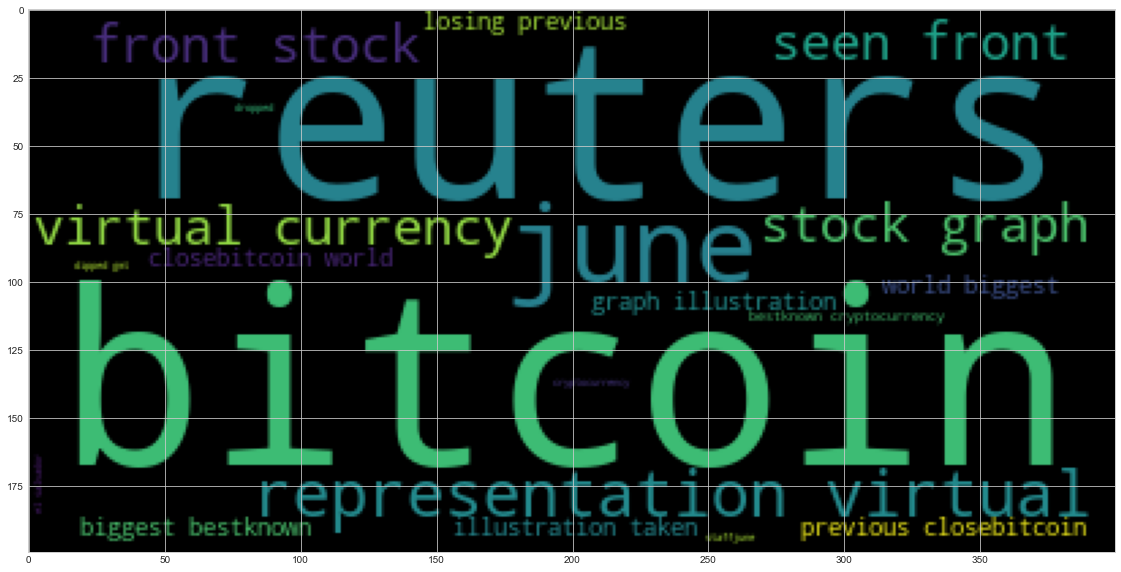

In [24]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_list)
plt.imshow(btc_wc)

In [25]:
eth_big_list = ' '.join([str(elem) for elem in eth_flat_tokenized_list ])
print(eth_big_list)

like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief filed underthe supply chain attack reached thousand organizationsillustration alex castro vergethree day ransomware attacker started holiday weekend comprom image copyrightgetty imagesthe gang behind colossal ransomware attack demanded paid bitcoin return universal decryptor say unlock file retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still lot work come onboarding longtime techcrunch reader know well michael arrington cofounded techcrunch crunchbase well venture fund crunchfund wa later renamed tuesday capital arringto london june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap forward humanity country london june reuters el salvador determined push ahead making bitcoin legal tender process bring small risk prove leap 

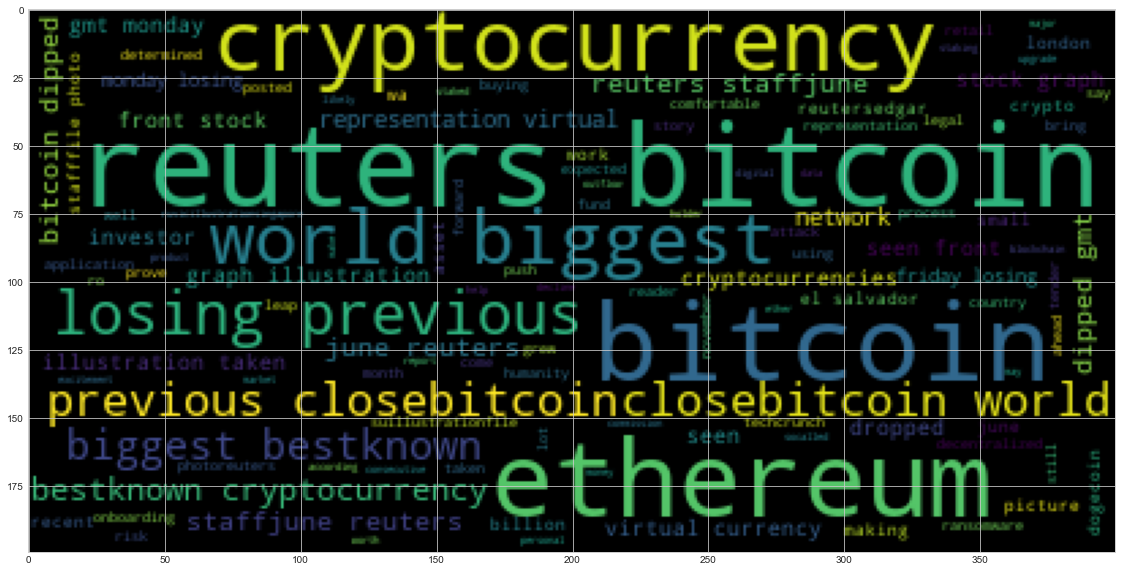

In [26]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_list)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
btc_text = []
for text in btc_df.text:
    btc_text.append(text)
    
btc_text_list = ' '.join([str(elem) for elem in btc_text])
print(btc_text_list)

Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:
The supply chain attack has reached over a thousand organizations.
Illustration by Alex Castro / The Verge
Three days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images
The gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund, which w

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_text_list)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(btc_entities)

['Reno', 'El Salvador', 'Aldo Baoicchi', 'Daymak', 'The Verge', 'Bitcoin and Ethereum', 'Crunchbase', 'LONDON', 'Reuters', 'El Salvador', 'LONDON', 'Reuters', 'El Salvador', 'REUTERS', 'Reuters', 'REUTERS', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'FILE', 'REUTERS', 'Reuters', 'UK', 'Spain', 'the US Department of Justi', 'Reuters', 'Reuters', 'REUTERS', 'Reuters', "Sotheby's", 'Reuters', 'Reuters', 'Reuters', 'FILE', 'REUTERS', 'Dado Ruvic/Illustration\r\nSINGAPORE', 'REUTERS', 'Dado Ruvic/IllustrationSINGAPORE', 'Reuters']


---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = []
for text in eth_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_list = ' '.join([str(elem) for elem in eth_text])
print(eth_text_list)

Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] Filed under:
The supply chain attack has reached over a thousand organizations.
Illustration by Alex Castro / The Verge
Three days after ransomware attackers started the holiday weekend by comprom… [+3376 chars] image copyrightGetty Images
The gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund, which w

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_text_list)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(eth_entities)

['Reno', 'El Salvador', 'Aldo Baoicchi', 'Daymak', 'The Verge', 'Bitcoin and Ethereum', 'Crunchbase', 'LONDON', 'Reuters', 'El Salvador', 'LONDON', 'Reuters', 'El Salvador', 'REUTERS', 'Reuters', 'REUTERS', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'FILE', 'REUTERS', 'Reuters', 'UK', 'Spain', 'the US Department of Justi', 'Reuters', 'Reuters', 'REUTERS', 'Reuters', "Sotheby's", 'Reuters', 'Reuters', 'Reuters', 'FILE', 'REUTERS', 'Dado Ruvic/Illustration\r\nSINGAPORE', 'REUTERS', 'Dado Ruvic/IllustrationSINGAPORE', 'Reuters', 'Bitcoin and Ethereum', 'JPMorgan', 'NFT', 'American Express', 'AI', 'The Securities and Exchange Commission', 'Reuters', 'Reuters', 'London', 'Getty Images\r\nInvestors', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'FILE', 'REUTERS', 'Reuters', 'Reuters', 'Reuters', 'Bitcoin, Ethereum', 'NEW YORK', 'Reuters', 'CoinShares']


---